## Etape 3 : Implémentation d'un algorithme génétique pour optimiser un réseau de livraison en Ile de France

+ creation du module `optim_gen`
+ Fonctions principales :
    + `no_client_to_deliver`
    + `one_client_to_deliver`
    + `run_vrptw`
    + `decode_to_GPS`
    + `simulation_vrptw`


In [14]:
from IPython.display import Image
import os
import pandas as pd
os.chdir("C:\Didou\Pro\devoirs\Mines\Projet info S2\optim_livraison\images")

## Fonctionnement de l'algorithme génétique

+ Création d'un individu : liste ordonnée de clients à visiter par l'ensemble des camions de l'entrepot, que l'on peut décoder à l'aide d'une matrice de coût temporel
+ Définition d'une population initiale constituée de 100 individus
+ Choix d'un nombre de *générations*, qui correspondent chacune à une étape de l'évolution
+ Définition d'un coût associé à chaque individu, que l'on cherchera à minimiser par la suite

In [1]:
# exemple d'un individu décodé en route
print(f'individu : {[1,2,3,4]}')
print(f'après décodage, grâce à la matrice des coûts : {[[0,1,2,0], [0,3,0], [0,4,0]]}')

individu : [1, 2, 3, 4]
après décodage, grâce à la matrice des coûts : [[0, 1, 2, 0], [0, 3, 0], [0, 4, 0]]


## Etapes de l'évolution

+ mutations par substitution uniquement (on n'autorise que les transformations de type permutation)
+ crossover entre deux individus

In [ ]:
# un exemple de mutation
import random
def mut_inverse_indexes(individual):
    '''
    Step of genetic algorithm : Mutation (only by inversion, to keep the unicity of each occurence) . No insertion or deletion allowed

    Input : individual (list)
    Output : mutated individual
    '''

    start, stop = sorted(random.sample(range(len(individual)), 2))
    print(f"indices d'inversion : {start, stop}")
    individual = individual[:start+1] + individual[stop:start:-1] + individual[stop+1:]
    return (individual, )
print(f"avant mutation :{[1,2,3,4,5,6,7,8,9]}")
print(f"après mutation : {mut_inverse_indexes([1,2,3,4,5,6,7,8,9])}")


In [ ]:
#exemple de crossover

def cx_partialy_matched(ind1, ind2):
    '''
    Step of the genetic algorithm : crossover

    Input : two individuals (list)
    Output : two individuals that have been modified
    '''
    size = min(len(ind1), len(ind2))
    try:
        cxpoint1, cxpoint2 = sorted(random.sample(range(size), 2))
        print(f"les indices de début et de fin sont : {cxpoint1, cxpoint2}")
    except ValueError:
        print('Error : Only one package to deliver')
    temp1 = ind1[cxpoint1:cxpoint2+1] + ind2
    temp2 = ind2[cxpoint1:cxpoint2+1] + ind1
    ind1 = []
    for gene in temp1:
        if gene not in ind1:
            ind1.append(gene)
    ind2 = []
    for gene in temp2:
        if gene not in ind2:
            ind2.append(gene)
    return ind1, ind2

print(f"avant crossover :{[1,4,3,6,5,2], [4,3,5,2,6,1]}")
print(f"après mutation : {cx_partialy_matched([1,4,3,6,5,2], [4,3,5,2,6,1])}")


## Simulation et optimisation d'un réseau de livraison

Les fonctions décrites par la suite sont des étapes de la fonction __simulation_vrptw__

+ Utilisation de la classe `Graphe` précédemment construite pour générer des fichiers csv correspondant chacun à l'ensemble des clients reliés à un entrepot et à leur demande pour un jour fixé. 

In [15]:
# entrepot 13
inputdata = pd.read_csv('exemple_simul_3_input.csv')
inputdata.drop('Unnamed: 0', 1, inplace=True)
inputdata

,Identifiant,Demande,latitude,longitude,entrepot,client 1,client 2,client 3,client 4,client 5
0,13,0.00,48.949716,2.286061,0.0,1932.0,4358.0,1276.0,2274.0,2423.0
1,24,0.62,49.058459,1.930484,1925.0,0.0,5693.0,2565.0,3609.0,3694.0
2,35,0.12,48.821412,3.137188,4285.0,5729.0,0.0,4007.0,4015.0,3819.0
3,52,0.54,48.835034,2.247933,1278.0,2405.0,4015.0,0.0,2641.0,1320.0
4,54,0.59,49.073293,2.672739,2232.0,3677.0,4053.0,2605.0,0.0,2945.0
5,63,0.86,48.739799,2.397568,2413.0,3589.0,3792.0,1351.0,2921.0,0.0


+ Fonction `no_client_to_deliver` pour enlever les dataframes inutiles
+ Fonction `one_client_to_deliver` pour traiter séparément les cas où il n'y a qu'un seul client à livrer dans l'entrepot i

+ Utilisation de notre algorithme génétique
+ Fonction `decode_to_GPS` pour exporter les résultats.

Exemple : pour l'entrepot 19, on obtient après évolution génétique un coût minimal de 2.26h de trajet total.

L'entrepot 19 étant le dernier à avoir été traité, on obtient par la suite les indivdus décodés en route pour chaque entrepot où il y a au minimum deux clients à livrer.

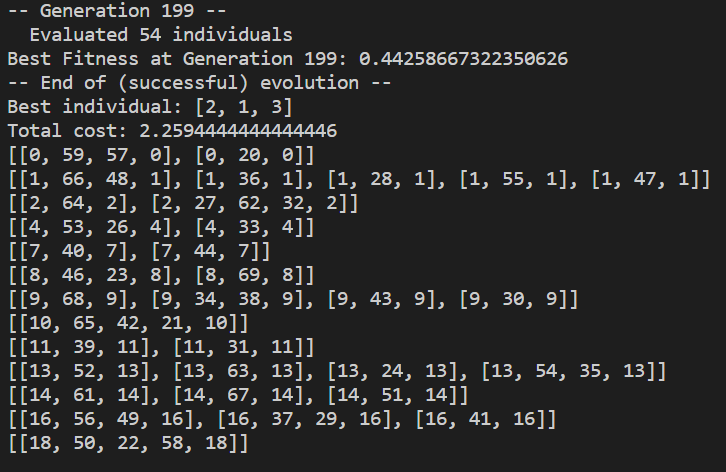

In [16]:
Image(filename = 'simul_3.png')

Les résultats pour chaque entrepot sont exportés sous forme de fichiers csv dans un dossier output_data.
Par exemple, pour l'entrepot 13 de la simulation, on obtient un Dataframe de ce type:

In [17]:
res_entrepot = pd.read_csv('exemple_simul_3.csv')
res_entrepot.drop('Unnamed: 0', 1, inplace = True)
res_entrepot

,camion1,camion2,camion3,camion4
0,13.0,13.0,13.0,13.0
1,52.0,63.0,24.0,54.0
2,13.0,13.0,13.0,35.0
3,NaN,NaN,NaN,13.0


Remarque : On a pris comme coût un coût temporel fixé par les contraintes de travail des camionneurs (qui ne doivent pas dépasser 8h de travail) en prenant également en compte la perte de temps due au temps de livraison.